# Importing the required modules

In [125]:
import tensorflow as tf
import numpy as np
import pandas 
import sklearn.svm
import matplotlib.pyplot as plt 
import cv2
import pandas as pd

# Changing The Directory

In [2]:
import os
os.chdir('C:/Users/Participant4/Desktop/HackathonDataset/Train_img')

# Preparing The DataSet

In [ ]:
def load_images_from_directory(directory, label):
    X = []
    Y = []
    for file in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, file), 0)
        X.append(img)
        Y.append(label)
    return X, Y

def load_images_and_labels():
    X = []
    Y = []
    data_directories = {
    1: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/1',
    2: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/2',
    3: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/3',
    4: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/4',
    5: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/5',
    6: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/6',
    7: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/7',
    8: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/8',
    9: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/9',
    10: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/10',
    11: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/11',
    12: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/12',
    13: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/13',
    14: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/14',
    15: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/15',
    16: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/16',
    17: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/17',
    18: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/18',
    19: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/19',
    20: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/20',
    21: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/21',
    22: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/22',
    23: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/23',
    24: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/24',
    25: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/25',
    26: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/26',
    27: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/27',
    28: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/28',
    29: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/29',
    30: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/30',
    31: 'C:/Users/Participant4/Desktop/HackathonDataset/Train_img/31'
}


    for label, directory in data_directories.items():
        x, y = load_images_from_directory(directory, label)
        X.extend(x)
        Y.extend(y)

    return X, Y

X, Y = load_images_and_labels()


# Converting the list to array and inverting the Image Data

In [40]:
X=np.array(X)

In [44]:
X.shape
X=np.invert(X)

9

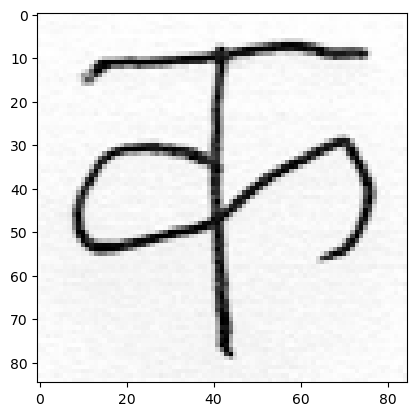

In [45]:
plt.imshow(X[12221],cmap='binary')
Y[12221]


In [46]:
Y=np.array(Y)

In [47]:
Y.shape

(44800,)

# Creating a Neural Network

In [130]:
model=tf.keras.models.Sequential()

In [131]:
X=tf.keras.utils.normalize(X)

In [132]:
model.add(tf.keras.layers.Flatten(input_shape=(85,85)))

In [133]:
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))

In [134]:

model.add(tf.keras.layers.Dense(33,activation='softmax'))

In [148]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])
model.fit(X,Y,epochs=15)

Epoch 1/15
1400/1400 [==============================] - 34s 24ms/step - loss: 0.1515 - accuracy: 0.9498
Epoch 2/15
1400/1400 [==============================] - 32s 23ms/step - loss: 0.1307 - accuracy: 0.9568
Epoch 3/15
1400/1400 [==============================] - 32s 23ms/step - loss: 0.1340 - accuracy: 0.9561
Epoch 4/15
1400/1400 [==============================] - 32s 23ms/step - loss: 0.1211 - accuracy: 0.9602
Epoch 5/15
1400/1400 [==============================] - 32s 23ms/step - loss: 0.1162 - accuracy: 0.9632
Epoch 6/15
1400/1400 [==============================] - 32s 23ms/step - loss: 0.1047 - accuracy: 0.9673
Epoch 7/15
1400/1400 [==============================] - 32s 23ms/step - loss: 0.1139 - accuracy: 0.9641
Epoch 8/15
1400/1400 [==============================] - 32s 23ms/step - loss: 0.0988 - accuracy: 0.9683
Epoch 9/15
1400/1400 [==============================] - 32s 23ms/step - loss: 0.0964 - accuracy: 0.9699
Epoch 10/15
1400/1400 [==============================] - 32s 23m

# Checking the loss and accuracy for Training DataSet

In [149]:
loss,accuracy = model.evaluate(X,Y)
print ("loss-:",loss*100,"%")
print ("accuracy-:",accuracy*100,"%")

1400/1400 [==============================] - 8s 6ms/step - loss: 0.0728 - accuracy: 0.9784
loss-: 7.28289932012558 %
accuracy-: 97.83705472946167 %


# Saving the Model

In [150]:
model.save('Hindi_Character_Recognition.model')

INFO:tensorflow:Assets written to: Hindi_Character_Recognition.model\assets


INFO:tensorflow:Assets written to: Hindi_Character_Recognition.model\assets


# Layered View of The Neural Network


In [153]:
import visualkeras as vk

In [154]:
vk.layered_view(model)

# Summary of The Model

In [155]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 7225)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               1849856   
                                                                 
 dense_11 (Dense)            (None, 256)               65792     
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 33)                8481      
                                                                 
Total params: 2,055,713
Trainable params: 2,055,713
No

# Creating a Validation Data Set from the train data Set 

In [156]:
x_test=X[40000:,:]

In [157]:
y_test=Y[40000:]

# Predicting on the Validation Data 

In [158]:
y_pred=model.predict(x_test)
result=[]
for i in range(0,4800):
    result.append(np.argmax(y_pred[i]))
result=np.array(result)


150/150 [==============================] - 1s 6ms/step


# Evaluating on the Validation Data 

In [159]:
model.evaluate(x_test,y_test)

150/150 [==============================] - 1s 6ms/step - loss: 0.0484 - accuracy: 0.9852


[0.04838845133781433, 0.9852083325386047]

# Confusion Matrix And Acuracy Score on the Validation Data 


Text(50.722222222222214, 0.5, 'actual')

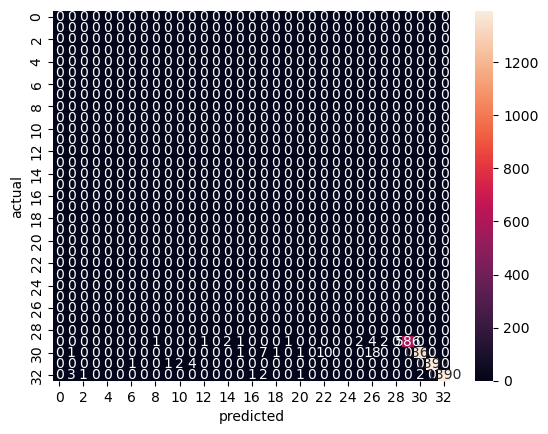

In [160]:
cm=tf.math.confusion_matrix(y_test,result)
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

In [161]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,result))

0.9852083333333334
